# 注意力提示

感谢读者对本书的关注，因为读者的注意力是一种稀缺的资源：
此刻读者正在阅读本书（而忽略了其他的书），
因此读者的注意力是用机会成本（与金钱类似）来支付的。
为了确保读者现在投入的注意力是值得的，
作者们尽全力（全部的注意力）创作一本好书。

自经济学研究稀缺资源分配以来，人们正处在“注意力经济”时代，
即人类的注意力被视为可以交换的、有限的、有价值的且稀缺的商品。
许多商业模式也被开发出来去利用这一点：
在音乐或视频流媒体服务上，人们要么消耗注意力在广告上，要么付钱来隐藏广告；
为了在网络游戏世界的成长，人们要么消耗注意力在游戏战斗中，
从而帮助吸引新的玩家，要么付钱立即变得强大。
总之，注意力不是免费的。

注意力是稀缺的，而环境中的干扰注意力的信息却并不少。
比如人类的视觉神经系统大约每秒收到$10^8$位的信息，
这远远超过了大脑能够完全处理的水平。
幸运的是，人类的祖先已经从经验（也称为数据）中认识到
“并非感官的所有输入都是一样的”。
在整个人类历史中，这种只将注意力引向感兴趣的一小部分信息的能力，
使人类的大脑能够更明智地分配资源来生存、成长和社交，
例如发现天敌、找寻食物和伴侣。

## 生物学中的注意力提示

注意力是如何应用于视觉世界中的呢？
这要从当今十分普及的*双组件*（two-component）的框架开始讲起：
这个框架的出现可以追溯到19世纪90年代的威廉·詹姆斯，
他被认为是“美国心理学之父”`James.2007`。
在这个框架中，受试者基于 *非自主性提示* 和 *自主性提示*
有选择地引导注意力的焦点。

非自主性提示是基于环境中物体的突出性和易见性。
想象一下，假如我们面前有五个物品：
一份报纸、一篇研究论文、一杯咖啡、一本笔记本和一本书，
就像`fig_eye-coffee`。
所有纸制品都是黑白印刷的，但咖啡杯是红色的。
换句话说，这个咖啡杯在这种视觉环境中是突出和显眼的，
不由自主地引起人们的注意。
所以我们会把视力最敏锐的地方放到咖啡上，
如`fig_eye-coffee`所示。

![由于突出性的非自主性提示（红杯子），注意力不自主地指向了咖啡杯](../img/eye-coffee.svg)

喝咖啡后，我们会变得兴奋并想读书，
所以转过头，重新聚焦眼睛，然后看看书，
就像`fig_eye-book`中描述那样。
与`fig_eye-coffee`中由于突出性导致的选择不同，
此时选择书是受到了认知和意识的控制，
因此注意力在基于自主性提示去辅助选择时将更为谨慎。
受试者的主观意愿推动，选择的力量也就更强大。

![依赖于任务的意志提示（想读一本书），注意力被自主引导到书上](../img/eye-book.svg)

## 查询、键和值

自主性注意力 与 非自主性注意力 提示解释了人类的注意力的方式，
下面来看看如何通过这两种注意力提示，
用神经网络来设计注意力机制的框架，

首先，考虑一个相对简单的状况，
即只使用非自主性提示。
要想将选择偏向于感官输入，
则可以简单地使用参数化的全连接层，
甚至是非参数化的最大汇聚层或平均汇聚层。

因此，“是否包含自主性提示”将注意力机制与全连接层或汇聚层区别开来。
在注意力机制的背景下，自主性提示被称为*查询*（query）。
给定任何查询，注意力机制通过*注意力汇聚*（attention pooling）
将选择引导至*感官输入*（sensory inputs，例如中间特征表示）。
在注意力机制中，这些感官输入被称为*值*（value）。

更通俗的解释，每个值都与一个*键*（key）配对，
这可以想象为感官输入的非自主提示。
如`fig_qkv`所示，可以通过设计注意力汇聚的方式，
便于给定的查询（自主性提示）与键（非自主性提示）进行匹配，
这将引导得出最匹配的值（感官输入）。

![注意力机制通过注意力汇聚将*查询*（自主性提示）和*键*（非自主性提示）结合在一起，实现对*值*（感官输入）的选择倾向](../img/qkv.svg)

鉴于上面所提框架在`fig_qkv`中的主导地位，
因此这个框架下的模型将成为本章的中心。
然而，注意力机制的设计有许多替代方案。
例如可以设计一个不可微的注意力模型，
该模型可以使用强化学习方法`Mnih.Heess.Graves.ea.2014`进行训练。

## 如何理解 QKV

### 理解一

在侦探工作中，我们经常面临大量的线索，每个线索都由一个属性（key）和其价值（value）组成。这些线索可能包括目击者证词、凶器、不在场证明等，而它们的价值可能各不相同，有的线索价值可能是正的，有的可能是负的，因为某些线索可能会误导调查。

如果我们不采用注意力机制，我们可能需要对所有线索进行平等的调查，这可能导致我们在不重要的线索上花费过多的时间和精力。数学上，这种做法相当于将所有线索的价值简单相加，由于价值有正有负，最终的总价值可能并不高，无法有效指导我们的调查。

然而，通过使用注意力机制，我们可以更加智能地处理这些线索。首先，我们会计算每个线索的属性（key）与我们当前关注的问题（query）之间的相关性。例如，凶器和目击者证词很可能与破案有很高的相关性。然后，我们会将那些与问题高度相关的线索的价值（value）进行加权求和，这样不仅可以保证我们集中精力在最重要的线索上，而且可以提高我们得到有价值信息的可能性。

### 理解二

想象你和女朋友去宜家买家具，那里有很多种家具，每个家具的设计理念不同。有的家具更适合女性，比如化妆台，而有的则可能更吸引男性，比如电竞椅。这些家具的设计偏向就可以看作是它们的“K”（Key）。

虽然化妆台可能更吸引女性，电竞椅可能更吸引男性，但每个人的喜好是不同的——比如，女生也可能会对电竞椅感兴趣。这种个人偏好就是每个人的“Q”（Query）。

那么，如何预测你女朋友会不会买电竞椅呢？我们可以通过她对电竞椅的兴趣（也就是电竞椅的K和她个人喜好Q之间的匹配度）来判断。如果这个匹配度很高，说明电竞椅对她的吸引力很强。这就是Q * K的含义。

接下来，每件家具都有自己的价格或价值，比如电竞椅的价值是V（Value）。因此，最终我们得到的就是你女朋友对每件家具的总偏好权重（Q * K），再结合每件家具的实际价值V，就能计算出她对每件家具的总体评估。

在Attention机制中，Q、K、V都表示为矩阵，这意味着我们可以同时计算出多个人对多件家具的偏好权重。最终，Q * K * V 就能帮助我们决定，每个人会更倾向于哪些家具（或者在原本的Attention场景中，帮助模型决定关注输入中的哪些信息）。

### 理解三

query、key、value的概念类似于python里的字典，一个key对应于一个value，不同之处在于key和value中间还加了一个权重。

训练的过程就是给每个key和value之间设置一个最合适的权重，等后面想要查询（query）某个key对应的value时，可以直接去查看权重最高的key、value组合；
否则（即key和value之间没有权重或所有权重相等），查询（query）只能一个key一个key的去找（没有目标与方向）。

### 理解四

[B站视频 -- 注意力机制的本质 | QKV矩阵](https://b23.tv/lHCsqpO)

## 注意力的可视化

平均汇聚层可以被视为输入的加权平均值，
其中各输入的权重是一样的。

**实际上，注意力汇聚得到的是加权平均的总和值，
其中权重是在给定的查询和不同的键之间计算得出的。**

In [1]:
import torch
from d2l import torch as d2l

为了可视化注意力权重，需要定义一个`show_heatmaps`函数。
其输入`matrices`的形状是
（要显示的行数，要显示的列数，查询的数目，键的数目）。

In [2]:
#@save
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap='Reds'):
    """显示矩阵热图"""
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

下面使用一个简单的例子进行演示。
在本例子中，仅当查询和键相同时，注意力权重为1，否则为0。

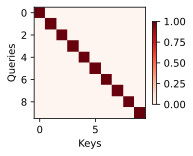

In [3]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))  # torch.eye(10) 生成一个10x10的单位矩阵
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

**上图中，纵坐标代表 query，横坐标代表 key，颜色代表权重值。**

后面的章节内容将经常调用`show_heatmaps`函数来显示注意力权重的分配。

## 小结

* 人类的注意力是有限的、有价值和稀缺的资源。
* 受试者使用非自主性和自主性提示有选择性地引导注意力。前者基于突出性，后者则依赖于意识。
* 注意力机制与全连接层或者汇聚层的区别源于增加的自主提示。
* 由于包含了自主性提示，注意力机制与全连接的层或汇聚层不同。
* 注意力机制通过注意力汇聚使选择偏向于值（感官输入），其中包含查询（自主性提示）和键（非自主性提示）。键和值是成对的。
* 可视化查询和键之间的注意力权重是可行的。

## 练习

1. 在机器翻译中通过解码序列词元时，其自主性提示可能是什么？非自主性提示和感官输入又是什么？
2. 随机生成一个$10 \times 10$矩阵并使用`softmax`运算来确保每行都是有效的概率分布，然后可视化输出注意力权重。

[Discussions](https://discuss.d2l.ai/t/5764)
